In [ ]:
import torch
from torch.distributions import Normal

import matplotlib.pyplot as plt

MEAN = 0
STD = 1.5

gassian_kernel = Normal(MEAN, STD)
exp_gaussian = torch.exp(gassian_kernel.sample(torch.Size([100000])))
print(exp_gaussian.max(), exp_gaussian.min())
fig, ax = plt.subplots()
ax.hist(exp_gaussian, bins=100)


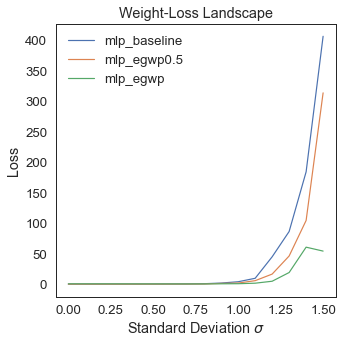

In [4]:
import os
import json
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('seaborn-white')
sns.set_theme(context='paper', style='white', font_scale=1.5)

fig, ax = plt.subplots(figsize=(5, 5))
landscapes = [
    'mlp_baseline',
    'mlp_egwp0.5',
    'mlp_egwp',
]
NOISE_STD = np.arange(0, 1.6, 0.1)

for model in landscapes:
    json_path = os.path.join('weight_losses', f'{model}.json')
    with open(json_path, 'r') as f:
        data = json.load(f)
    losses = np.array(data['losses'])
    ax.plot(NOISE_STD, losses, label=model)

ax.set_title('Weight-Loss Landscape')
ax.set_xlabel('Standard Deviation $\sigma$')
ax.set_ylabel('Loss')
ax.legend()
fig.tight_layout()